In [1]:
import os
import nltk
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


In [ ]:
# importing NLTK libarary stopwords 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

print(stopwords.words('english'))

# random sentecnce with lot of stop words
sample_text = "Oh man, this is pretty cool. We will do more such things."
text_tokens = word_tokenize(sample_text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]

print(text_tokens)
print(tokens_without_sw)

In [ ]:

from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
# Set up TWINT config
c = twint.Config()

In [ ]:
c = twint.Config()
c.Limit = 20000
c.Lang = "en"
c.Store_csv = True
c.Pandas = True
c.Search = "Vaccine Card"
c.Count = True
c.Retries_count = 20
c.Since = "2021-09-07"
c.Until = "2021-09-28"
c.Output = "VacineCard_Nohas.csv"


twint.run.Search(c)

In [ ]:
twint.run.Search(c)

In [2]:
df = pd.read_csv('VacineCard_Nohas.csv')
# data = data1[['tweet']]
# data

In [3]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   36
Count of rows in the data is:   20010


In [5]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [4]:
df[['place','likes_count','near','geo','source']]

,place,likes_count,near,geo,source
0,NaN,1,NaN,NaN,NaN
1,NaN,4,NaN,NaN,NaN
2,NaN,5,NaN,NaN,NaN
3,NaN,0,NaN,NaN,NaN
4,NaN,2,NaN,NaN,NaN
...,...,...,...,...,...
20005,NaN,1,NaN,NaN,NaN
20006,NaN,0,NaN,NaN,NaN
20007,NaN,0,NaN,NaN,NaN
20008,NaN,0,NaN,NaN,NaN


In [6]:
df.drop_duplicates(inplace = True)

In [7]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(df)
tw_list['text'] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([⁰-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

KeyError: 0

In [8]:
df[['date']]

,date
0,2021-09-26
1,2021-09-26
2,2021-09-26
3,2021-09-26
4,2021-09-26
...,...
20005,2021-09-09
20006,2021-09-09
20007,2021-09-09
20008,2021-09-09


In [9]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

print(form_sentence(df['tweet'].iloc[10]))
print(df['tweet'].iloc[10])

why is the vaccine card not wallet sized man
why is the vaccine card not wallet sized man


In [10]:
#extract year,month,day into new columns from datetime column
df['year']=pd.to_datetime(df['date']).dt.strftime('%Y')
df['month']=pd.to_datetime(df['date']).dt.strftime('%m')
df['day']=pd.to_datetime(df['date']).dt.strftime('%A')

In [11]:
def preprocess_tweets(tweet):
    
    fo = open("stopwords.txt", "r+")
    stop_words = list(fo.read().split(','))
    translation={39:None}
    processed_tweet = tweet
    processed_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in str(stop_words).translate(translation))
    return(processed_tweet)
df['Processed Tweet'] = df['tweet'].apply(lambda x: preprocess_tweets(x.lower()))

In [12]:
#here we are making a new column 'polarity' by applying textblob function on the processed tweets which are in english language
from textblob import TextBlob
df['polarity'] = df[df['language']=='en']['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])

In [13]:
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else('negative' if x<0  else 'neutral'))

In [22]:
# only subjectivity
df['subjectivity_score'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

In [23]:
df[['date','username','tweet','language','sentiment','polarity','subjectivity_score']]

,date,username,tweet,language,sentiment,polarity,subjectivity_score
0,2021-09-26,josecru16191249,Here’s my vaccine card https://t.co/Zfb1P81jSE,en,neutral,0.000000,0.000000
1,2021-09-26,ilovetaguig1,"𝗙𝗼𝗿 𝗦𝗲𝗽𝘁. 𝟮𝟳, 𝟮𝟬𝟮𝟭 (𝗠𝗼𝗻𝗱𝗮𝘆), those who missed ...",en,positive,0.053333,0.213333
2,2021-09-26,bushidoshi,@GirlFuturist @brucewilson Arts degree with va...,en,positive,0.250000,0.250000
3,2021-09-26,puregoldj,@chipfranklin @POTUS What exactly is a « vacci...,en,positive,0.250000,0.250000
4,2021-09-26,wordsleadmeon,@prairiecentrist In BC he wouldn't even be all...,en,neutral,0.000000,0.095833
...,...,...,...,...,...,...,...
20005,2021-09-09,amoore12321_,@Chilly_MIV Yeah ikr and I lost my vaccine car...,en,positive,0.136364,0.727273
20006,2021-09-09,casadormusic,i hate to break it to you but buying a fake va...,en,negative,-0.366667,0.700000
20007,2021-09-09,tlcannady,@Martina Did you ask to see his vaccine card. ...,en,neutral,0.000000,0.000000
20008,2021-09-09,kerrylorkovic,"(cont’d) “Bring your vaccine card, picture ide...",en,neutral,0.000000,0.000000


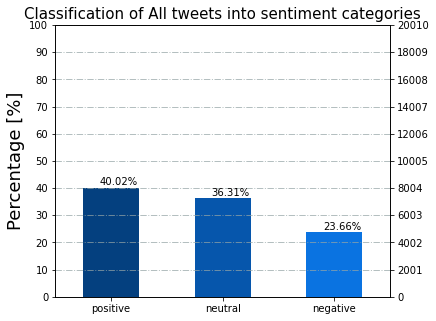

In [15]:
plt.figure(figsize=(6,5))
plt.title('Classification of All tweets into sentiment categories',fontsize=15)
plt.ylabel('Percentage [%]',fontsize=18)
ax = (df.sentiment.value_counts()/len(df)*100).plot(kind="bar", rot=0,color=['#04407F','#0656AC','#0A73E1'])
ax.set_yticks(np.arange(0, 110, 10))
plt.grid(color='#95a5a6', linestyle='-.', linewidth=1, axis='y', alpha=0.7)
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

Text(0, 0.5, 'Number of tweets')

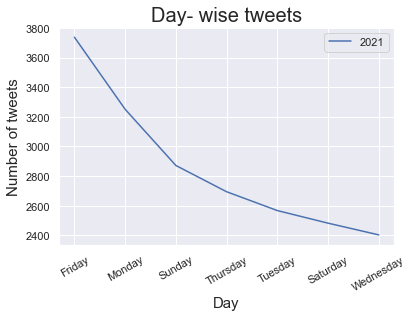

In [16]:
y=set(df['year'])
sns.set(style='darkgrid',)
for item in list(y):
    data=df[df['year']==item]['day'].value_counts().reindex()
    sns.lineplot(data = data,palette = "hot", legend="brief",label=item)
plt.xticks(rotation=30)
plt.legend()
plt.title('Day- wise tweets',fontsize = 20)
plt.xlabel('Day',fontsize = 15)
plt.ylabel('Number of tweets',fontsize = 15)

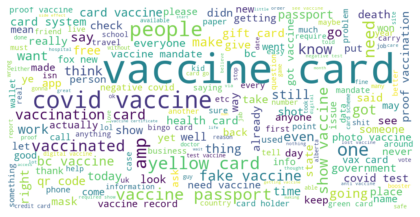

In [17]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(tweet for tweet in df['Processed Tweet'].astype(str))
wordcloud = WordCloud(
    background_color = 'white',
    width = 1000,
    height = 500).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.rcParams['figure.figsize'] = [20, 20]
plt.tight_layout()


In [18]:
from textblob import TextBlob
df['polarity_score'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment)
df['polarity'] = df['polarity_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

TypeError: '>' not supported between instances of 'Sentiment' and 'int'

In [19]:
import re
from nltk.corpus import stopwords
def clean_text(text):
    tweet = re.sub("(@_?[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split()
    filtered_words = [word for word in tweet if word not in stopwords.words('english')]
    return filtered_words

In [25]:
hours_avg=df[['replies_count','retweets_count','likes_count','polarity_score','subjectivity_score']].groupby(df.index).mean()
hours_avg

,replies_count,retweets_count,likes_count,subjectivity_score
0,0.0,1.0,1.0,0.000000
1,4.0,3.0,4.0,0.213333
2,0.0,0.0,5.0,0.250000
3,2.0,0.0,0.0,0.250000
4,2.0,0.0,2.0,0.095833
...,...,...,...,...
20005,0.0,0.0,1.0,0.727273
20006,0.0,0.0,0.0,0.700000
20007,0.0,0.0,0.0,0.000000
20008,0.0,0.0,0.0,0.000000


In [26]:
plt.figure(figsize=(12,9))
plt.plot(hours_avg['polarity_score'],color='green',marker='o')
plt.xlabel('Hour of the Day') 
plt.title('Average Tweet Sentiment Score by Hour of the Day');

KeyError: 'polarity_score'

<Figure size 864x648 with 0 Axes>